In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/department-of-justice-20092018-press-releases/combined.json
/kaggle/input/news-category-dataset/News_Category_Dataset_v2.json


In [4]:
df = pd.read_json ('/kaggle/input/news-category-dataset/News_Category_Dataset_v2.json',lines=True)
df.to_csv (r'output.csv', index = None)

In [6]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [5]:
df.describe()

,category,headline,authors,link,short_description,date
count,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://www.polit...,,2013-01-17 00:00:00
freq,32739,90,36620,2,19712,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [8]:
df['headline'].shape

(200853,)

In [9]:
df.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

In [10]:
df.drop_duplicates('headline',keep = False, inplace = True)

In [11]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [12]:
df.shape

(198627, 6)

In [13]:
from sklearn.feature_extraction import text

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df['headline'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [16]:
X

<198627x55264 sparse matrix of type '<class 'numpy.float64'>'
	with 1255858 stored elements in Compressed Sparse Row format>

In [18]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[7000:7300])

55264
['brittman', 'brittney', 'britton', 'brixx', 'bro', 'broach', 'broaches', 'broad', 'broadband', 'broadbent', 'broadcast', 'broadcasted', 'broadcaster', 'broadcasters', 'broadcasting', 'broadcasts', 'broaden', 'broadening', 'broadens', 'broader', 'broadly', 'broads', 'broadside', 'broadus', 'broadway', 'broadwayhd', 'broadwell', 'broccoli', 'brochu', 'brock', 'brockman', 'brockovich', 'broder', 'broderick', 'brodeur', 'brodie', 'brodinsky', 'brodsky', 'brody', 'broga', 'brograine', 'brogressives', 'broiled', 'broiling', 'broils', 'brokaw', 'broke', 'brokeback', 'broken', 'brokenhearted', 'broker', 'brokered', 'brokers', 'brolin', 'brolsters', 'bromance', 'bromances', 'bromantic', 'bromide', 'bromstad', 'bromwich', 'bronchitis', 'bronco', 'broncos', 'bronfman', 'bronies', 'bronner', 'brontë', 'brontës', 'bronx', 'bronze', 'bronzed', 'bronzer', 'bronzing', 'bronzino', 'brooch', 'brood', 'brooding', 'broods', 'brook', 'brooke', 'brookelyn', 'brookfield', 'brookings', 'brookline', 'br

In [20]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [28]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


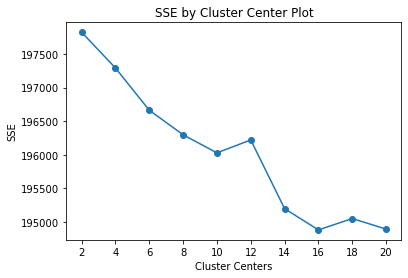

In [29]:
find_optimal_clusters(X, 20)

In [30]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(X)

In [31]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [33]:
get_top_keywords(X, clusters, vectorizer.get_feature_names(), 10)


Cluster 0
dress,worst,day,world,recipes,style,week,life,best,photos

Cluster 1
just,health,know,people,kids,time,world,women,video,day

Cluster 2
new,won,north,gop,president,clinton,obama,study,trump,says

Cluster 3
orleans,times,week,fashion,video,photos,city,year,york,new

Cluster 4
hate,valentine,day,letters,reasons,story,life,photos,letter,love

Cluster 5
want,recipes,feel,video,photos,day,mistakes,better,ways,make

Cluster 6
gop,race,trump,campaign,2016,candidate,debate,election,candidates,presidential

Cluster 7
ideas,house,new,ways,sprout,make,video,stay,photos,home

Cluster 8
morning,email,anti,russia,clinton,campaign,gop,administration,president,trump

Cluster 9
colbert,campaign,new,gop,president,says,hillary,clinton,trump,donald

Cluster 10
year,world,know,tips,reasons,best,ways,photos,things,10

Cluster 11
new,10,destinations,tips,photos,trump,weekly,zen,ban,travel

Cluster 12
meet,friday,photo,video,dinner,friends,vacation,photos,blended,family

Cluster 13
supremacy,gop,co

# Here we are seeing that the clusters are quite relatable..

In [35]:
data= pd.read_json ('/kaggle/input/department-of-justice-20092018-press-releases/combined.json',lines=True)
data.to_csv (r'output.csv', index = None)

In [36]:
data.head()

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13087 entries, 0 to 13086
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          12810 non-null  object
 1   title       13087 non-null  object
 2   contents    13087 non-null  object
 3   date        13087 non-null  object
 4   topics      13087 non-null  object
 5   components  13087 non-null  object
dtypes: object(6)
memory usage: 613.6+ KB


In [38]:
data.isnull().sum()

id            277
title           0
contents        0
date            0
topics          0
components      0
dtype: int64

In [39]:
data.shape

(13087, 6)

In [42]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['contents'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
new_x = vectorizer.fit_transform(desc)

In [44]:
new_x

<13087x59339 sparse matrix of type '<class 'numpy.float64'>'
	with 2609326 stored elements in Compressed Sparse Row format>

In [45]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


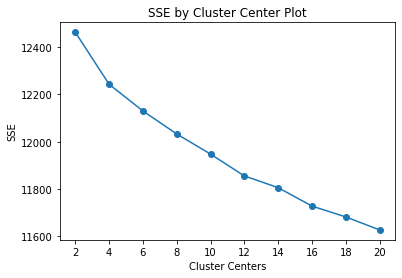

In [46]:
find_optimal_clusters(new_x, 20)

In [51]:
clusters = MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=20).fit_predict(new_x)

In [52]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [53]:
get_top_keywords(new_x, clusters, vectorizer.get_feature_names(), 10)


Cluster 0
wildlife,elvers,harvested,south,eels,fish,north,bass,striped,carolina

Cluster 1
fda,services,act,government,medicare,false,settlement,care,claims,health

Cluster 2
preparer,prepared,preparers,preparing,income,injunction,complaint,customers,returns,tax

Cluster 3
revenue,taxes,division,refunds,attorney,false,income,returns,irs,tax

Cluster 4
images,sexual,children,ceos,safe,project,exploitation,childhood,pornography,child

Cluster 5
abt,cocaine,texas,police,aka,drug,murder,racketeering,members,gang

Cluster 6
beneficiaries,home,strike,oig,services,hhs,care,fraud,health,medicare

Cluster 7
emissions,environment,settlement,pollution,oil,air,clean,water,environmental,epa

Cluster 8
police,division,justice,department,officers,victim,attorney,voting,civil,rights

Cluster 9
new,states,criminal,office,general,law,district,justice,department,attorney

Cluster 10
division,district,auctions,task,guilty,conspiracy,criminal,antitrust,financial,fraud

Cluster 11
civil,fair,osc,employment

# In another dataset also our K Means algorithm is working nicely..